In [ ]:
from google.colab import files
uploaded = files.upload(
)

Saving task 2.csv to task 2.csv


Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Basic dtypes:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Post‑cleaning NA check:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


/tmp/ipython-input-2-3901567103.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clean["age"].fillna(titanic_clean["age"].median(), inplace=True)
/tmp/ipython-input-2-3901567103.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

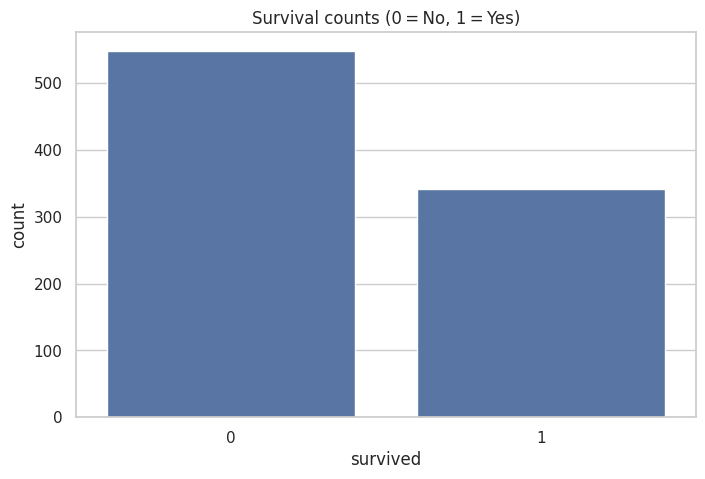

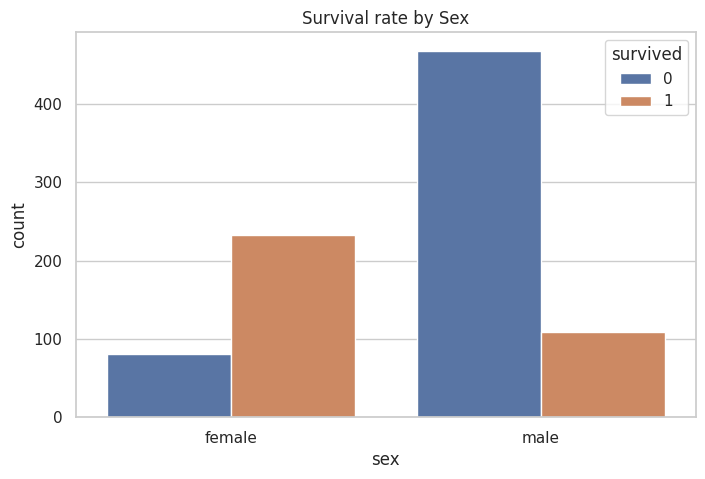

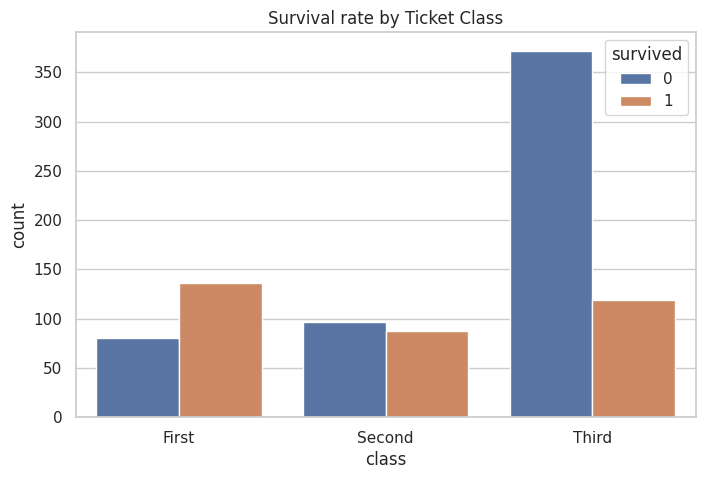

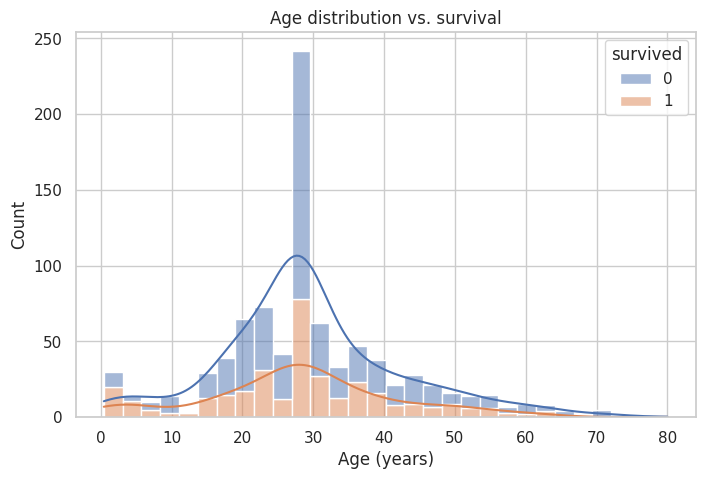

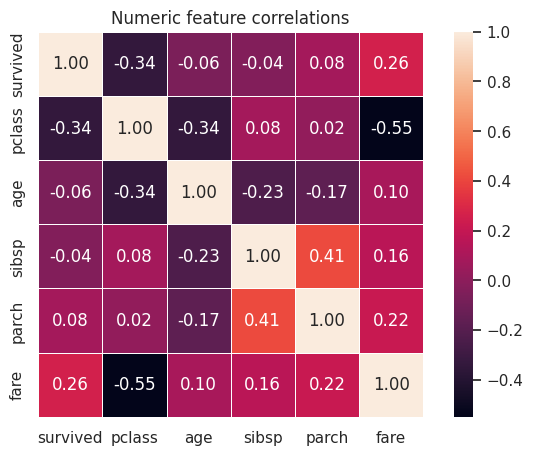


Mean survival rate by class & sex:


sex,female,male
class,,
First,0.97,0.37
Second,0.92,0.16
Third,0.50,0.14


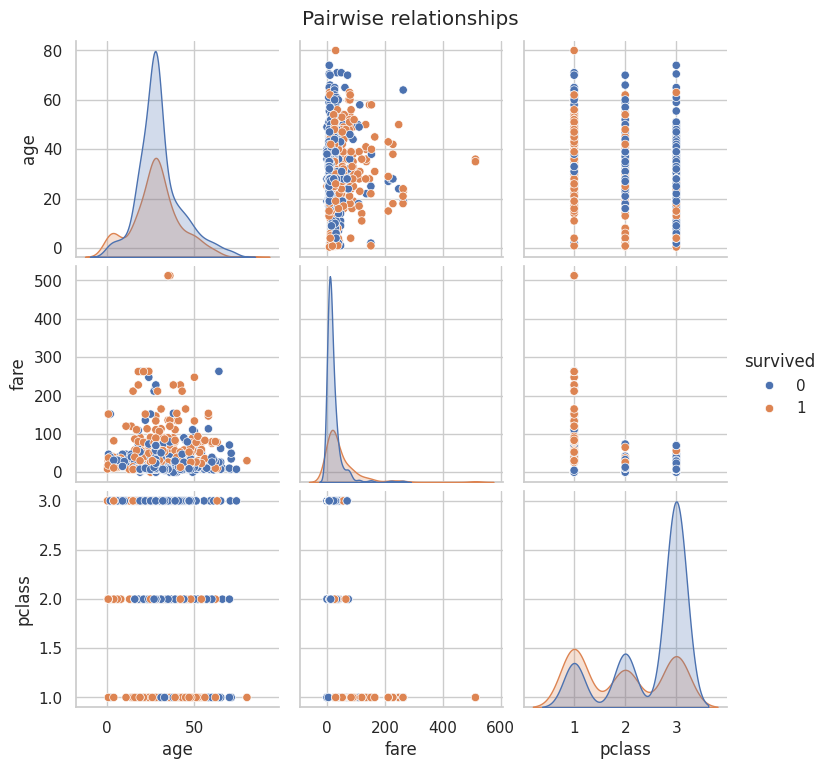


Cleaned dataset saved as titanic_clean.csv


In [ ]:
# --------------------------------------------------
# 1. Imports & settings
# --------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")          # nicer default look
plt.rcParams["figure.figsize"] = (8, 5)   # slightly larger plots

# --------------------------------------------------
# 2. Load the Titanic dataset
# --------------------------------------------------
titanic = sns.load_dataset("titanic")   # built‑in copy from Seaborn
print("Shape:", titanic.shape)
display(titanic.head())

# --------------------------------------------------
# 3. Quick data‑quality scan
# --------------------------------------------------
print("\nMissing values per column:")
print(titanic.isna().sum())

print("\nBasic dtypes:")
print(titanic.dtypes)

# --------------------------------------------------
# 4. Cleaning steps
# --------------------------------------------------
titanic_clean = titanic.copy()

# 4.1 Impute 'age' with the median
titanic_clean["age"].fillna(titanic_clean["age"].median(), inplace=True)

# 4.2 Impute 'embarked' with the mode (most common port)
titanic_clean["embarked"].fillna(titanic_clean["embarked"].mode()[0],
                                 inplace=True)

# 4.3 Drop 'deck' – too many NAs ( > 75 %)
titanic_clean.drop(columns=["deck"], inplace=True)

# 4.4 Convert object‑like columns to 'category'
for col in ["sex", "class", "embarked", "who", "adult_male", "alone"]:
    titanic_clean[col] = titanic_clean[col].astype("category")

print("\nPost‑cleaning NA check:")
print(titanic_clean.isna().sum())

# --------------------------------------------------
# 5. Exploratory Data Analysis (EDA)
# --------------------------------------------------
### 5.1 Overall survival
sns.countplot(data=titanic_clean, x="survived")
plt.title("Survival counts (0 = No, 1 = Yes)")
plt.show()

### 5.2 Survival by Sex
sns.countplot(data=titanic_clean, x="sex", hue="survived")
plt.title("Survival rate by Sex")
plt.show()

### 5.3 Survival by Passenger Class
sns.countplot(data=titanic_clean, x="class", hue="survived")
plt.title("Survival rate by Ticket Class")
plt.show()

### 5.4 Age distribution & survival overlay
sns.histplot(data=titanic_clean, x="age", hue="survived",
             bins=30, kde=True, multiple="stack")
plt.title("Age distribution vs. survival")
plt.xlabel("Age (years)")
plt.show()

### 5.5 Correlation heat‑map (numeric cols)
num_cols = titanic_clean.select_dtypes(include=["int", "float"]).columns
corr = titanic_clean[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title("Numeric feature correlations")
plt.show()

### 5.6 Cross‑tab: Survival by Class & Sex
ct = pd.crosstab(titanic_clean["class"],
                 titanic_clean["sex"],
                 titanic_clean["survived"],
                 aggfunc="mean").round(2)
print("\nMean survival rate by class & sex:")
display(ct)

### 5.7 Pairplot of key numeric vars
sns.pairplot(titanic_clean,
             vars=["age", "fare", "pclass"],
             hue="survived",
             diag_kind="kde")
plt.suptitle("Pairwise relationships", y=1.02)
plt.show()

# --------------------------------------------------
# 6. (Optional) Save the cleaned data for later modelling
# --------------------------------------------------
titanic_clean.to_csv("titanic_clean.csv", index=False)
print("\nCleaned dataset saved as titanic_clean.csv")
